## This contains the code for the experiments on changing parameters (Number of layers, Number of Epochs, and Validation Threshold

In [1]:
#various imports used during the program
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
# Reshaping the dataframes to allow them to be stitched together, randomised and then split apart into training and testing
# sets
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [5]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
# defining the base model
model = Sequential()

In [7]:
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
#training the base model
Base_Model = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 10s 762us/step - loss: 0.8421 - accuracy: 0.7329 - val_loss: 0.6080 - val_accuracy: 0.7784
Epoch 2/20
12660/12660 [==============================] - 8s 671us/step - loss: 0.3729 - accuracy: 0.8764 - val_loss: 0.4584 - val_accuracy: 0.8755
Epoch 3/20
12660/12660 [==============================] - 9s 732us/step - loss: 0.2730 - accuracy: 0.9135 - val_loss: 0.5679 - val_accuracy: 0.8499
Epoch 4/20
12660/12660 [==============================] - 9s 673us/step - loss: 0.2352 - accuracy: 0.9267 - val_loss: 0.4036 - val_accuracy: 0.9017
Epoch 5/20
12660/12660 [==============================] - 8s 652us/step - loss: 0.1942 - accuracy: 0.9397 - val_loss: 0.4146 - val_accuracy: 0.9010
Epoch 6/20
12660/12660 [==============================] - 8s 610us/step - loss: 0.1479 - accuracy: 0.9493 - val_loss: 0.3412 - val_accuracy: 0.9204
Epoch 7/20
12660/12660 [==============================] - 8s 6

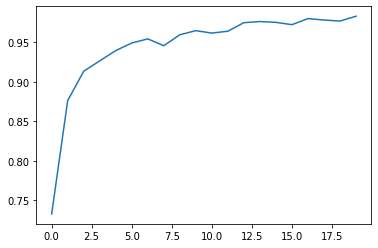

In [11]:
plt.plot(Base_Model.history['accuracy'])

Text(0, 0.5, 'Accuracy')

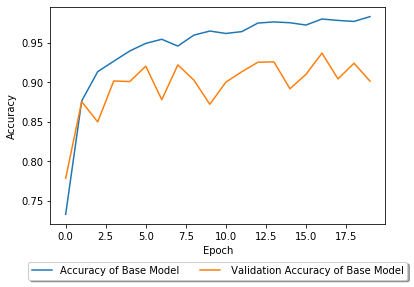

In [12]:
plt.plot(Base_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(Base_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [13]:
score = model.evaluate(x_test, y_test) 

4170/4170 [==============================] - 1s 160us/step


In [14]:
score 

[0.5651509608081776, 0.90143883228302]

In [15]:
predictions = model.predict_classes(x_test, batch_size=10)

In [16]:
rounded_labels=np.argmax(y_test, axis=1)

In [17]:
cm = confusion_matrix(rounded_labels, predictions)

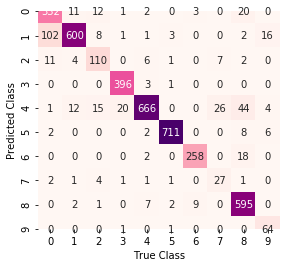

In [18]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [19]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       450
           1       0.82      0.95      0.88       630
           2       0.78      0.73      0.76       150
           3       0.99      0.94      0.97       420
           4       0.85      0.97      0.90       690
           5       0.98      0.99      0.98       720
           6       0.93      0.96      0.94       270
           7       0.71      0.45      0.55        60
           8       0.97      0.86      0.91       690
           9       0.97      0.71      0.82        90

    accuracy                           0.90      4170
   macro avg       0.89      0.83      0.85      4170
weighted avg       0.90      0.90      0.90      4170



# Changing Layers

## Double the layers

In [20]:
model1 = Sequential()

In [21]:
model1.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model1.add(Dense(512, activation = 'relu'))

# Layer 3
model1.add(Dense(512, activation = 'relu'))

# Layer 4
model1.add(Dense(512, activation = 'relu'))

#Output Layer
model1.add(Dense(10, activation = 'softmax'))

In [22]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [24]:
DoubleLayer = model1.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 14s 1ms/step - loss: 0.8562 - accuracy: 0.7106 - val_loss: 1.0974 - val_accuracy: 0.7235
Epoch 2/20
12660/12660 [==============================] - 13s 1ms/step - loss: 0.3580 - accuracy: 0.8664 - val_loss: 0.4736 - val_accuracy: 0.8235
Epoch 3/20
12660/12660 [==============================] - 13s 1ms/step - loss: 0.2685 - accuracy: 0.9044 - val_loss: 1.0195 - val_accuracy: 0.6926
Epoch 4/20
12660/12660 [==============================] - 13s 1ms/step - loss: 0.2567 - accuracy: 0.9120 - val_loss: 0.4780 - val_accuracy: 0.8566
Epoch 5/20
12660/12660 [==============================] - 13s 1ms/step - loss: 0.2047 - accuracy: 0.9271 - val_loss: 0.4309 - val_accuracy: 0.8619
Epoch 6/20
12660/12660 [==============================] - 13s 1ms/step - loss: 0.1802 - accuracy: 0.9353 - val_loss: 0.3698 - val_accuracy: 0.8983
Epoch 7/20
12660/12660 [==============================] - 13s 1ms/ste

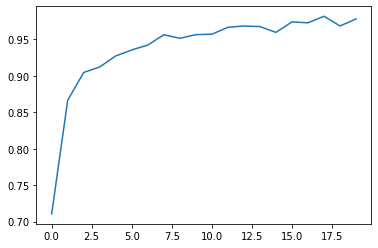

In [25]:
plt.plot(DoubleLayer.history['accuracy'])

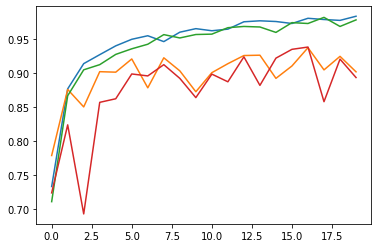

In [26]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(DoubleLayer.history['accuracy'])
plt.plot(DoubleLayer.history['val_accuracy'])

In [27]:
score = model1.evaluate(x_test, y_test)

4170/4170 [==============================] - 1s 199us/step


In [28]:
score

[0.45621541519816833, 0.8930455446243286]

In [29]:
predictions = model1.predict_classes(x_test, batch_size=10)

In [30]:
cm = confusion_matrix(rounded_labels, predictions)

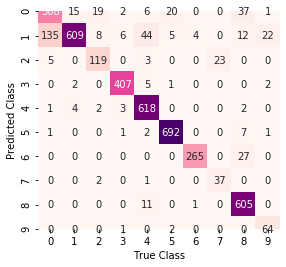

In [31]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [32]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.75      0.68      0.72       450
           1       0.72      0.97      0.83       630
           2       0.79      0.79      0.79       150
           3       0.98      0.97      0.97       420
           4       0.98      0.90      0.94       690
           5       0.98      0.96      0.97       720
           6       0.91      0.98      0.94       270
           7       0.93      0.62      0.74        60
           8       0.98      0.88      0.93       690
           9       0.96      0.71      0.82        90

    accuracy                           0.89      4170
   macro avg       0.90      0.85      0.86      4170
weighted avg       0.90      0.89      0.89      4170



## Half the Layers

In [33]:
model2 = Sequential()

In [34]:
model2.add(Dense(512, activation = 'relu',input_shape=(784,)))

#Output Layer
model2.add(Dense(10, activation = 'softmax'))

In [35]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
OneLayer = model2.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 5s 424us/step - loss: 0.9858 - accuracy: 0.7158 - val_loss: 0.7156 - val_accuracy: 0.7772
Epoch 2/20
12660/12660 [==============================] - 5s 387us/step - loss: 0.4488 - accuracy: 0.8738 - val_loss: 0.7540 - val_accuracy: 0.7801
Epoch 3/20
12660/12660 [==============================] - 5s 432us/step - loss: 0.3514 - accuracy: 0.8979 - val_loss: 0.4533 - val_accuracy: 0.8700
Epoch 4/20
12660/12660 [==============================] - 5s 390us/step - loss: 0.2752 - accuracy: 0.9200 - val_loss: 0.4485 - val_accuracy: 0.8892
Epoch 5/20
12660/12660 [==============================] - 5s 390us/step - loss: 0.2370 - accuracy: 0.9340 - val_loss: 0.3874 - val_accuracy: 0.8796
Epoch 6/20
12660/12660 [==============================] - 5s 389us/step - loss: 0.2002 - accuracy: 0.9437 - val_loss: 0.4586 - val_accuracy: 0.8566
Epoch 7/20
12660/12660 [==============================] - 5s 40

Text(0, 0.5, 'Accuracy')

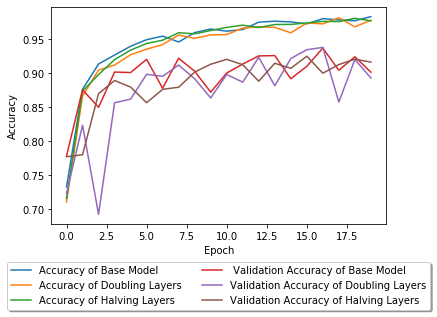

In [38]:
plt.plot(Base_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(DoubleLayer.history['accuracy'], label='Accuracy of Doubling Layers')
plt.plot(OneLayer.history['accuracy'], label='Accuracy of Halving Layers')
plt.plot(Base_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.plot(DoubleLayer.history['val_accuracy'], label='Validation Accuracy of Doubling Layers')
plt.plot(OneLayer.history['val_accuracy'], label='Validation Accuracy of Halving Layers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



In [39]:
score = model2.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 99us/step


In [40]:
score

[0.426184591836334, 0.9163069725036621]

In [41]:
predictions = model2.predict_classes(x_test, batch_size=10)

In [42]:
cm = confusion_matrix(rounded_labels, predictions)

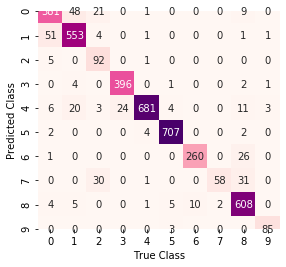

In [43]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [44]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       450
           1       0.91      0.88      0.89       630
           2       0.94      0.61      0.74       150
           3       0.98      0.94      0.96       420
           4       0.91      0.99      0.94       690
           5       0.99      0.98      0.99       720
           6       0.91      0.96      0.93       270
           7       0.48      0.97      0.64        60
           8       0.96      0.88      0.92       690
           9       0.97      0.94      0.96        90

    accuracy                           0.92      4170
   macro avg       0.89      0.90      0.88      4170
weighted avg       0.92      0.92      0.92      4170



# Changing Epochs

## Half Epochs

In [45]:
model3 = Sequential()

In [46]:
model3.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model3.add(Dense(512, activation = 'relu'))

#Output Layer
model3.add(Dense(10, activation = 'softmax'))

In [47]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [48]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [49]:
HalfEpochs = model3.fit(x_train,y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/10
12660/12660 [==============================] - 8s 651us/step - loss: 0.8398 - accuracy: 0.7347 - val_loss: 0.7000 - val_accuracy: 0.7827
Epoch 2/10
12660/12660 [==============================] - 7s 588us/step - loss: 0.3902 - accuracy: 0.8728 - val_loss: 0.4626 - val_accuracy: 0.8640
Epoch 3/10
12660/12660 [==============================] - 8s 605us/step - loss: 0.2651 - accuracy: 0.9108 - val_loss: 0.4030 - val_accuracy: 0.8866
Epoch 4/10
12660/12660 [==============================] - 8s 599us/step - loss: 0.2368 - accuracy: 0.9225 - val_loss: 0.6652 - val_accuracy: 0.8458
Epoch 5/10
12660/12660 [==============================] - 8s 623us/step - loss: 0.1891 - accuracy: 0.9409 - val_loss: 0.6047 - val_accuracy: 0.8403
Epoch 6/10
12660/12660 [==============================] - 8s 596us/step - loss: 0.1785 - accuracy: 0.9424 - val_loss: 0.4291 - val_accuracy: 0.8837
Epoch 7/10
12660/12660 [==============================] - 8s 62

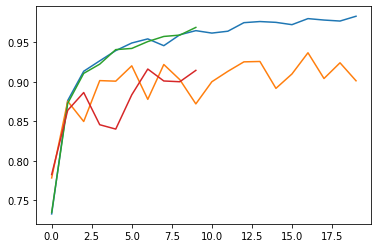

In [50]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(HalfEpochs.history['accuracy'])
plt.plot(HalfEpochs.history['val_accuracy'])

In [51]:
score = model3.evaluate(x_test, y_test)

4170/4170 [==============================] - 1s 140us/step


In [52]:
score

[0.41465672719464314, 0.9146283268928528]

(0, 10.0)

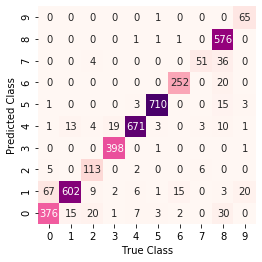

In [53]:
predictions = model3.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
axes = plt.gca()
axes.set_ylim([0,10.0])

In [54]:
print(classification_report(rounded_labels,predictions))


              precision    recall  f1-score   support

           0       0.83      0.84      0.83       450
           1       0.83      0.96      0.89       630
           2       0.90      0.75      0.82       150
           3       0.99      0.95      0.97       420
           4       0.93      0.97      0.95       690
           5       0.97      0.99      0.98       720
           6       0.93      0.93      0.93       270
           7       0.56      0.85      0.68        60
           8       0.99      0.83      0.91       690
           9       0.98      0.72      0.83        90

    accuracy                           0.91      4170
   macro avg       0.89      0.88      0.88      4170
weighted avg       0.92      0.91      0.92      4170



# Double Epochs

In [55]:
model5 = Sequential()

In [56]:
model5.add(Dense(512, activation='relu', input_shape=(784,)))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(10, activation='softmax'))


In [57]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [59]:
DoubleEpochs = model5.fit(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/40
12660/12660 [==============================] - 8s 643us/step - loss: 0.8141 - accuracy: 0.7470 - val_loss: 0.6721 - val_accuracy: 0.7911
Epoch 2/40
12660/12660 [==============================] - 8s 597us/step - loss: 0.3882 - accuracy: 0.8732 - val_loss: 0.5550 - val_accuracy: 0.8261
Epoch 3/40
12660/12660 [==============================] - 8s 602us/step - loss: 0.2727 - accuracy: 0.9100 - val_loss: 0.8993 - val_accuracy: 0.7712
Epoch 4/40
12660/12660 [==============================] - 7s 587us/step - loss: 0.2374 - accuracy: 0.9247 - val_loss: 0.4800 - val_accuracy: 0.8688
Epoch 5/40
12660/12660 [==============================] - 8s 602us/step - loss: 0.1990 - accuracy: 0.9337 - val_loss: 0.5352 - val_accuracy: 0.8683
Epoch 6/40
12660/12660 [==============================] - 7s 586us/step - loss: 0.1734 - accuracy: 0.9432 - val_loss: 0.3581 - val_accuracy: 0.9213
Epoch 7/40
12660/12660 [==============================] - 8s 60

Text(0, 0.5, 'Accuracy')

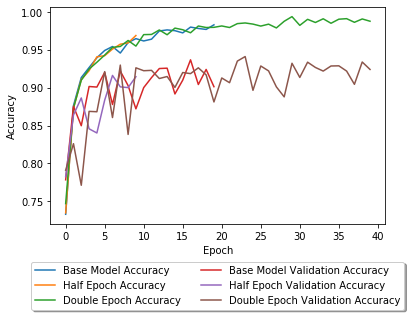

In [60]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(HalfEpochs.history['accuracy'], label='Half Epoch Accuracy')
plt.plot(DoubleEpochs.history['accuracy'], label='Double Epoch Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(HalfEpochs.history['val_accuracy'], label='Half Epoch Validation Accuracy')
plt.plot(DoubleEpochs.history['val_accuracy'], label='Double Epoch Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [61]:
score = model5.evaluate(x_test, y_test)

4170/4170 [==============================] - 1s 135us/step


In [62]:
score

[0.5493720605634421, 0.924220621585846]

Text(79.60000000000001, 0.5, 'Predicted Class')

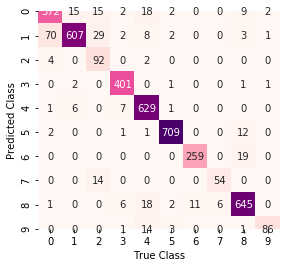

In [63]:
predictions = model5.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [64]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       450
           1       0.84      0.96      0.90       630
           2       0.94      0.61      0.74       150
           3       0.99      0.95      0.97       420
           4       0.98      0.91      0.94       690
           5       0.98      0.98      0.98       720
           6       0.93      0.96      0.95       270
           7       0.79      0.90      0.84        60
           8       0.94      0.93      0.94       690
           9       0.82      0.96      0.88        90

    accuracy                           0.92      4170
   macro avg       0.91      0.90      0.90      4170
weighted avg       0.93      0.92      0.92      4170



In [65]:
model6 = Sequential()

In [66]:
model6.add(Dense(512, activation='relu', input_shape=(784,)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(10, activation='softmax'))

In [67]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [69]:
FiveEpochs = model6.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/5
12660/12660 [==============================] - 11s 873us/step - loss: 0.8108 - accuracy: 0.7442 - val_loss: 0.5929 - val_accuracy: 0.8014
Epoch 2/5
12660/12660 [==============================] - 10s 799us/step - loss: 0.3692 - accuracy: 0.8765 - val_loss: 0.5835 - val_accuracy: 0.8103
Epoch 3/5
12660/12660 [==============================] - 8s 637us/step - loss: 0.2812 - accuracy: 0.9085 - val_loss: 0.4581 - val_accuracy: 0.8748
Epoch 4/5
12660/12660 [==============================] - 8s 655us/step - loss: 0.2383 - accuracy: 0.9217 - val_loss: 0.3806 - val_accuracy: 0.9022
Epoch 5/5
12660/12660 [==============================] - 8s 625us/step - loss: 0.1913 - accuracy: 0.9368 - val_loss: 0.3127 - val_accuracy: 0.9213


Text(0, 0.5, 'Accuracy')

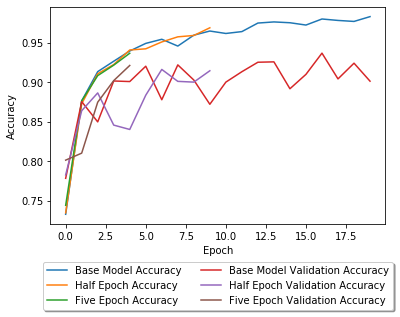

In [70]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(HalfEpochs.history['accuracy'], label='Half Epoch Accuracy')
plt.plot(FiveEpochs.history['accuracy'], label='Five Epoch Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(HalfEpochs.history['val_accuracy'], label='Half Epoch Validation Accuracy')
plt.plot(FiveEpochs.history['val_accuracy'], label='Five Epoch Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Validation Threshold

In [71]:
from keras.callbacks import EarlyStopping

In [111]:
model8 = Sequential()

In [112]:
model8.add(Dense(512, activation='relu', input_shape=(784,)))
model8.add(Dense(512, activation='relu'))
model8.add(Dense(10, activation='softmax'))

In [113]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001)

In [114]:
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [115]:
model8.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [116]:
Activation1 = model8.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test), callbacks=[es])

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 9s 733us/step - loss: 0.8676 - accuracy: 0.7227 - val_loss: 0.6840 - val_accuracy: 0.7568
Epoch 2/20
12660/12660 [==============================] - 9s 680us/step - loss: 0.3830 - accuracy: 0.8758 - val_loss: 0.6057 - val_accuracy: 0.8129
Epoch 3/20
12660/12660 [==============================] - 8s 643us/step - loss: 0.2784 - accuracy: 0.9072 - val_loss: 0.4596 - val_accuracy: 0.8743
Epoch 4/20
12660/12660 [==============================] - 9s 687us/step - loss: 0.2132 - accuracy: 0.9306 - val_loss: 0.4042 - val_accuracy: 0.8933
Epoch 5/20
12660/12660 [==============================] - 8s 660us/step - loss: 0.1967 - accuracy: 0.9361 - val_loss: 0.5228 - val_accuracy: 0.8647


Text(0, 0.5, 'Accuracy')

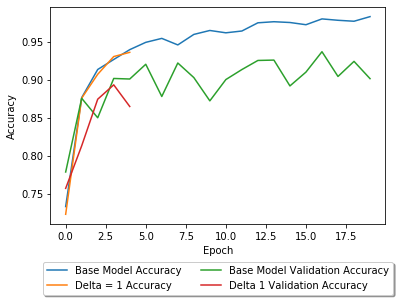

In [117]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(Activation1.history['accuracy'], label='Delta = 1 Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(Activation1.history['val_accuracy'], label='Delta 1 Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [118]:
predictions = model8.predict_classes(x_test, batch_size=10)

Text(79.60000000000001, 0.5, 'Predicted Class')

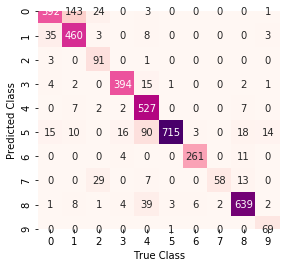

In [119]:
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [120]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       450
           1       0.90      0.73      0.81       630
           2       0.96      0.61      0.74       150
           3       0.94      0.94      0.94       420
           4       0.97      0.76      0.85       690
           5       0.81      0.99      0.89       720
           6       0.95      0.97      0.96       270
           7       0.54      0.97      0.69        60
           8       0.91      0.93      0.92       690
           9       0.99      0.77      0.86        90

    accuracy                           0.86      4170
   macro avg       0.87      0.85      0.84      4170
weighted avg       0.88      0.86      0.86      4170



In [121]:
model9 = Sequential()

In [122]:
model9.add(Dense(512, activation='relu', input_shape=(784,)))
model9.add(Dense(512, activation='relu'))
model9.add(Dense(10, activation='softmax'))

In [123]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.01)

In [124]:
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [125]:
model9.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_33 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [126]:
Activation2 = model9.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test), callbacks=[es])

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 10s 773us/step - loss: 0.8238 - accuracy: 0.7354 - val_loss: 0.6332 - val_accuracy: 0.8218
Epoch 2/20
12660/12660 [==============================] - 8s 618us/step - loss: 0.3702 - accuracy: 0.8801 - val_loss: 0.4283 - val_accuracy: 0.8616
Epoch 3/20
12660/12660 [==============================] - 8s 629us/step - loss: 0.2784 - accuracy: 0.9074 - val_loss: 0.4861 - val_accuracy: 0.8496


Text(0, 0.5, 'Accuracy')

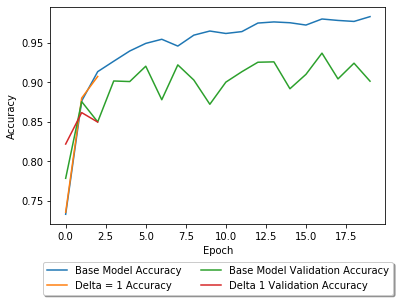

In [127]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(Activation2.history['accuracy'], label='Delta = 1 Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(Activation2.history['val_accuracy'], label='Delta 1 Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [128]:
predictions = model9.predict_classes(x_test, batch_size=10)

In [129]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.78      0.33      0.46       450
           1       0.60      0.97      0.74       630
           2       0.88      0.71      0.79       150
           3       0.89      0.97      0.93       420
           4       0.96      0.88      0.92       690
           5       0.99      0.96      0.98       720
           6       0.93      0.93      0.93       270
           7       0.56      0.78      0.65        60
           8       0.96      0.89      0.92       690
           9       0.97      0.67      0.79        90

    accuracy                           0.85      4170
   macro avg       0.85      0.81      0.81      4170
weighted avg       0.87      0.85      0.84      4170

